In [1]:
import os
import pandas as pd
import pyreadr
import geopandas as gpd

In [9]:
# output_dir = r'C:\Workspace\VisionEval_build\VisionEval\built\visioneval\4.1.2\runtime\models\VERSPM\Datastore'
output_dir = r'C:\Workspace\VisionEval\models\VERSPM\Datastore'

year = '2018'
def export_households(output_dir, year, scenario_name):

    hh_df = pd.DataFrame()
    hh_path = os.path.join(output_dir, year, 'Household')
    for fname in os.listdir(hh_path):
        result = pyreadr.read_r(os.path.join(hh_path, fname))
        hh_df[fname.split('.')[0]] = result['Dataset']['Dataset']
    hh_df['Scenario'] = scenario_name

    return hh_df

In [3]:
soundcast_dir = r'L:\RTP_2022\final_runs\sc_rtp_2018_final\soundcast\outputs\daysim'

# Load soundcast reslts for vehicles and drivers
daysim_hh = pd.read_csv(os.path.join(soundcast_dir,'_household.tsv'), delim_whitespace=True)
daysim_trip = pd.read_csv(os.path.join(soundcast_dir,'_trip.tsv'), delim_whitespace=True)
daysim_person = pd.read_csv(os.path.join(soundcast_dir,'_person.tsv'), delim_whitespace=True)

In [10]:

hh_df_base = export_households(output_dir, year='2018', scenario_name='2018')

In [ ]:
# output_dir

In [13]:
pd.options.display.float_format = '{:0,.0f}'.format

In [14]:
def build_table(ve_arg, sc_arg, format_map="{:,.1%}"):
    ve_val = pd.eval(ve_arg, engine='python')
    sc_val = pd.eval(sc_arg, engine='python')
    df = pd.DataFrame([ve_val,sc_val]).T
    df.columns = ['VisionEval', 'Soundcast']
    # df.fillna(-1, inplace=True)
    df['Diff'] = df['VisionEval']-df['Soundcast']
    df['% Diff'] = (df['Diff']/df['Soundcast'])
    df[['% Diff']] = df[['% Diff']].applymap(format_map.format)

    return df

In [15]:
hh_df_base.columns

Index(['Age0to14', 'Age15to19', 'Age20to29', 'Age30to54', 'Age55to64',
       'Age65Plus', 'AveCO2ePM', 'AveGPM', 'AveKWHPM', 'AveRoadUseTaxPM',
       'AveSocEnvCostPM', 'AveTrpLenDiverted', 'AveVehCostPM', 'AveVehTripLen',
       'Azone', 'BikeTrips', 'Bzone', 'CarSvcLevel', 'DailyCO2e', 'DailyGGE',
       'DailyKWH', 'Drivers', 'Drv15to19', 'Drv20to29', 'Drv30to54',
       'Drv55to64', 'Drv65Plus', 'DrvAgePersons', 'Dvmt', 'FreeParkingSpaces',
       'HasPaydIns', 'HhId', 'HhSize', 'HhType', 'HouseType', 'Income',
       'IsEcoDrive', 'IsIMP', 'IsUrbanMixNbrhd', 'LifeCycle', 'LocType',
       'Marea', 'NumAuto', 'NumHighCarSvc', 'NumLtTrk', 'OtherParkingCost',
       'OwnCost', 'OwnCostSavings', 'ParkingUnitCost', 'PropDvmtDiverted',
       'PropTdmDvmtReduction', 'SovDvmtProp', 'TransitTrips', 'UrbanDvmtProp',
       'Vehicles', 'VehicleTrips', 'WalkTrips', 'Wkr15to19', 'Wkr20to29',
       'Wkr30to54', 'Wkr55to64', 'Wkr65Plus', 'Workers', 'Scenario'],
      dtype='object')

# Total DVMT

In [16]:
daysim_dvmt = daysim_trip[(daysim_trip['mode'].isin([3,4,5])) & (daysim_trip['dorp'] == 1)]
pd.options.display.float_format = '{:0,.0f}'.format
build_table("hh_df_base['Dvmt'].sum()", 
            "daysim_dvmt['travdist'].sum()")

,VisionEval,Soundcast,Diff,% Diff
0,"75,541,664","68,905,101","6,636,564",9.6%


# DVMT per Capita

In [17]:
pd.options.display.float_format = '{:0,.2f}'.format
build_table("hh_df_base['Dvmt'].sum()/hh_df_base['HhSize'].sum()", 
            "daysim_dvmt['travdist'].sum()/daysim_hh['hhsize'].sum()")

,VisionEval,Soundcast,Diff,% Diff
0,18.64,17.00,1.64,9.6%


# DVMT per Household

In [18]:
pd.options.display.float_format = '{:0,.2f}'.format
build_table("hh_df_base['Dvmt'].sum()/hh_df_base['HhSize'].count()", 
            "daysim_dvmt['travdist'].sum()/daysim_hh['hhsize'].count()")

,VisionEval,Soundcast,Diff,% Diff
0,47.03,42.92,4.10,9.6%


# Vehicle Ownership

In [19]:
build_table("hh_df_base['Vehicles'].sum()", "daysim_hh['hhvehs'].sum()")

,VisionEval,Soundcast,Diff,% Diff
0,"3,537,945.00","3,069,100.00","468,845.00",15.3%


In [20]:
# daysim_hh.hhexpfac.count

In [21]:
pd.options.display.float_format = '{:0,.2f}'.format
# Average Autos Owned by Household
build_table("hh_df_base['Vehicles'].sum()/hh_df_base['HhId'].count()", "daysim_hh['hhvehs'].sum()/daysim_hh['hhexpfac'].sum()")

,VisionEval,Soundcast,Diff,% Diff
0,2.20,1.91,0.29,15.2%


In [22]:
build_table("hh_df_base.groupby('Vehicles').count()['Age0to14']", "daysim_hh.groupby('hhvehs').sum()['hhexpfac']")

,VisionEval,Soundcast,Diff,% Diff
0.00,NaN,"106,565.00",NaN,nan%
1.00,"438,916.00","486,738.00","-47,822.00",-9.8%
2.00,"605,260.00","584,187.00","21,073.00",3.6%
3.00,"397,460.00","297,104.00","100,356.00",33.8%
4.00,"132,260.00","130,669.00","1,591.00",1.2%
5.00,"27,521.00",NaN,NaN,nan%
6.00,"4,721.00",NaN,NaN,nan%
7.00,74.00,NaN,NaN,nan%
8.00,80.00,NaN,NaN,nan%


# Trip Length


In [23]:
build_table("hh_df_base['AveVehTripLen'].mean()", "daysim_dvmt['travdist'].mean()")

,VisionEval,Soundcast,Diff,% Diff
0,8.09,6.90,1.19,17.2%


# Mode Share

# Trips by Mode
## Walk Trips

In [24]:
build_table("hh_df_base['WalkTrips'].sum()", "daysim_trip[daysim_trip['mode'] == 1]['trexpfac'].sum()")

,VisionEval,Soundcast,Diff,% Diff
0,"1,356,755.45","2,023,687.00","-666,931.55",-33.0%


## Bike Trips

In [25]:
build_table("hh_df_base['BikeTrips'].sum()", "daysim_trip[daysim_trip['mode'] == 2]['trexpfac'].sum()")

,VisionEval,Soundcast,Diff,% Diff
0,"81,337.26","229,995.00","-148,657.74",-64.6%


## Vehicle Trips

In [33]:
build_table("hh_df_base['VehicleTrips'].sum()", "daysim_dvmt['trexpfac'].sum()")

,VisionEval,Soundcast,Diff,% Diff
0,"8,732,423.71","9,987,537.00","-1,255,113.29",-12.6%



## Transit Trips 

In [34]:
build_table("hh_df_base['TransitTrips'].sum()", "daysim_trip[daysim_trip['mode'] == 6]['trexpfac'].sum()")

,VisionEval,Soundcast,Diff,% Diff
0,"490,509.30","480,781.00","9,728.30",2.0%


# Household Composition

In [13]:
pd.options.display.float_format = '{:0,.2f}'.format
build_table("hh_df_base['HhSize'].mean()", "daysim_hh['hhsize'].mean()")

,VisionEval,Soundcast,Diff,% Diff
0,2.52,2.52,-0.00,-0.1%


In [14]:
# Create categories for daysim by age
age_bins = [-1, 15, 20, 30, 55, 65, 200]
age_labels = ['Age0to14','Age15to19','Age20to29','Age30to54','Age55to64','Age65Plus']
daysim_person['age_group'] = pd.cut(daysim_person['pagey'], age_bins, labels=age_labels)
df = daysim_person.groupby('age_group').sum()[['psexpfac']]

In [15]:
build_table("hh_df_base[age_labels].sum()", "df['psexpfac']")


,VisionEval,Soundcast,Diff,% Diff
Age0to14,"689,370.00","738,213.00","-48,843.00",-6.6%
Age15to19,"261,890.00","258,374.00","3,516.00",1.4%
Age20to29,"553,679.00","572,952.00","-19,273.00",-3.4%
Age30to54,"1,402,819.00","1,399,930.00","2,889.00",0.2%
Age55to64,"572,932.00","558,953.00","13,979.00",2.5%
Age65Plus,"572,402.00","524,732.00","47,670.00",9.1%


## Workers

In [16]:
build_table("hh_df_base['Workers'].sum()", "daysim_person[daysim_person['pwtyp'] > 0]['psexpfac'].sum()")


,VisionEval,Soundcast,Diff,% Diff
0,"1,657,659.00","1,982,128.00","-324,469.00",-16.4%


In [17]:
# Workers by Age
worker_age_group = ['15to19', '20to29','30to54', '55to64', '65Plus']
worker_cols = ['Wkr'+i for i in worker_age_group]
df = hh_df_base[worker_cols].sum()
df.index = worker_age_group

df_sc = daysim_person[daysim_person['pwtyp'] >0].groupby('age_group').sum()['psexpfac']
df_sc.drop('Age0to14', inplace=True)
df_sc.index = worker_age_group

build_table("df","df_sc")

,VisionEval,Soundcast,Diff,% Diff
15to19,"47,277.00","65,953.00","-18,676.00",-28.3%
20to29,"325,364.00","422,307.00","-96,943.00",-23.0%
30to54,"893,842.00","1,086,230.00","-192,388.00",-17.7%
55to64,"306,316.00","329,537.00","-23,221.00",-7.0%
65Plus,"84,860.00","78,101.00","6,759.00",8.7%


## Income

In [19]:
# Mean Income
build_table("hh_df_base['Income'].mean()","daysim_hh['hhincome'].mean()")

,VisionEval,Soundcast,Diff,% Diff
0,"106,899.51","107,071.37",-171.86,-0.2%


In [19]:
# Median Income
build_table("hh_df_base['Income'].mean()","daysim_hh['hhincome'].median()")

,VisionEval,Soundcast,Diff,% Diff
0,"106,899.51","82,000.00","24,899.51",30.4%


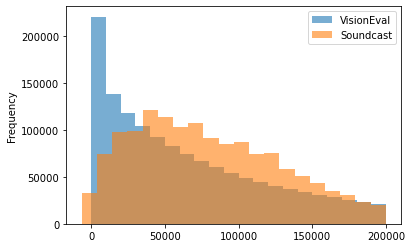

In [20]:
%matplotlib inline
ax= hh_df_base[hh_df_base['Income'] < 200000]['Income'].plot(kind='hist', bins=20,  alpha=0.6, legend=True)
daysim_hh[daysim_hh['hhincome'] < 200000]['hhincome'].plot(kind='hist', bins=20, ax=ax, alpha=0.6, legend=True)
ax.legend(labels=['VisionEval','Soundcast'])
# plt.legend,'test2

In [21]:
hh_df_base['Dvmt'].sum()

74200479.55557129